# Impact of various events on market efficiencies in Indian Stock market

In this notebook, we'll analyse how various events in stock exchange have impacted the efficiencies in the Indian Stock market

1. Load data
2. Describe events and break it down
3. Perform various test of randomness on each section of the data

In [1]:
import pandas as pd
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import entropy, ttest_ind
import seaborn as sns


## Data along with descriptive statistics

The tick by tick was analysed for the periods from 1999-2017. 

## Events

### Market events

1. CTCL - Computer to Computer link - in year 2000 - https://www.nseindia.com/content/circulars/cmtr1641.htm - May 12 2000
2. CTCL for Trading - https://www.nseindia.com/content/circulars/cmtr3896.htm - Jan 28 2003
3. DMA facility - April 3rd 2008, Securities & Exchange Board of India (SEBI), started allowing Direct Market Access facility which allows buying or selling of orders by institutional clients without manual intervention by brokers.
4. Colocation Facility - https://www.nseindia.com/content/circulars/memb12985.zip - August 31, 2009
5. Tick by Tick - December 03, 2009 IP Connectivity for Category T (Tick by Tick) (zip) - before this time, all data was provided at the fastest rate of 1 update per second. 
6. March 10, 2014 Tick by Tick (TBT) market data over Multicast (pdf)

In [2]:
events = ['1999-01-01','2000-05-12','2003-01-28','2008-04-03','2009-08-31','2009-12-03','2014-03-10','2017-03-01']

In [7]:
#Run section below to populate df first
df_by_events ={}
descriptive_stats = {}
for i in range(len(events)-1):
    descriptive_stats[i] = {}
    df_by_events[events[i]] = df[(df.index >events[i]) & (df.index<events[i+1])]
    #print("Average number of trades in period", events[i],"to",events[i+1],":",df_by_events[events[i]].N.mean())
    descriptive_stats[i]['number_of_days'] = df_by_events[events[i]].N.count()
    descriptive_stats[i]['total_trades'] = df_by_events[events[i]].N.sum()
    descriptive_stats[i]['avg_no_of_trades'] = df_by_events[events[i]].N.mean()

descriptive_stats = pd.DataFrame(descriptive_stats).T

In [ ]:
descriptive_stats

In [ ]:
descriptive_stats.avg_no_of_trades.plot(kind='bar',title='Average number of trades over 6 periods')

## Conditional probalities and student t-test


In [8]:
probability_list = ['P(-)','P(-|-)','P(-|--)','P(-|---)','P(-|----)']#,'P(-|-----)']
probability_list += ['P(-|+)','P(-|++)','P(-|+++)','P(-|++++)']

In [ ]:
#df_by_events[events[0]][probability_list]

In [9]:
df_by_events.keys()

dict_keys(['2000-05-12', '2008-04-03', '2009-12-03', '2003-01-28', '2009-08-31', '1999-01-01', '2014-03-10'])

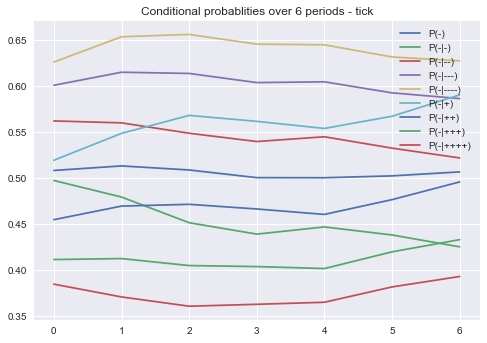

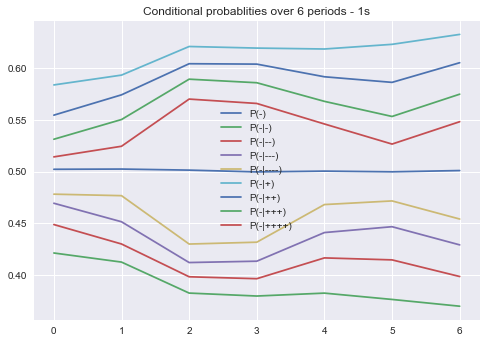

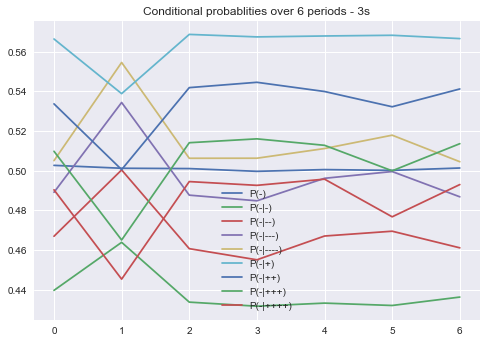

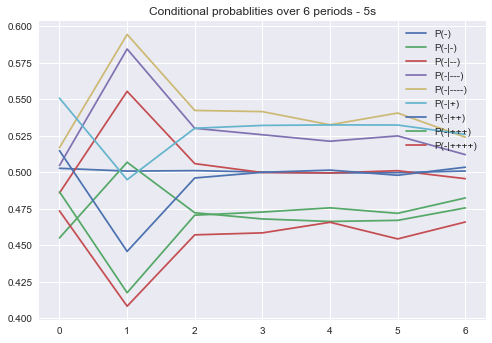

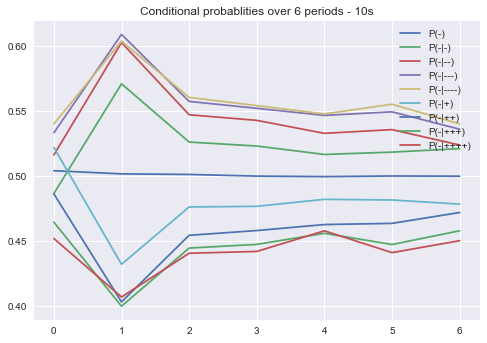

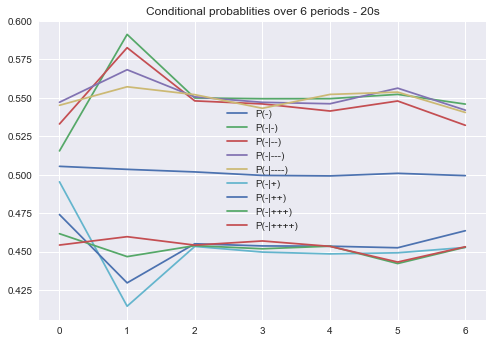

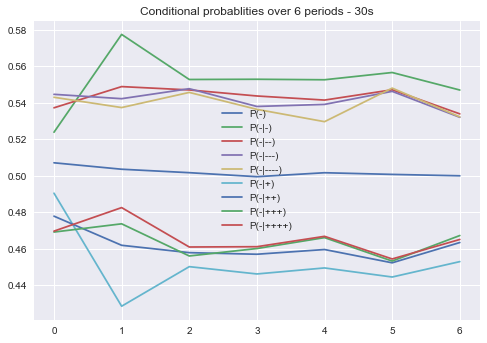

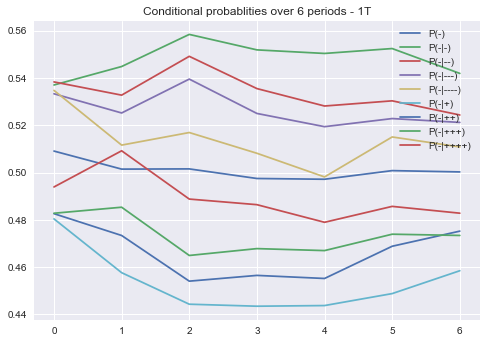

In [10]:
for timespan in timespans:
    df = df_all_timespans[timespan]

    df_by_events ={}
    descriptive_stats = {}
    for i in range(len(events)-1):
        descriptive_stats[i] = {}
        df_by_events[events[i]] = df[(df.index >events[i]) & (df.index<events[i+1])]


    conditional_prob_mean =[0]* (len(events)-1)
    prob_df = [0]* (len(events)-1)
    for i in range(len(events)-1):
        #print
        Y = df_by_events[events[i]][probability_list].dropna()
        conditional_prob_mean[i] = Y.mean()
        prob_df[i] = Y['P(-|-)']

    plt.plot(conditional_prob_mean)
    plt.title('Conditional probablities over 6 periods - '+timespan)
    plt.legend(probability_list)
    plt.show()

In [11]:
probability_list

['P(-)',
 'P(-|-)',
 'P(-|--)',
 'P(-|---)',
 'P(-|----)',
 'P(-|+)',
 'P(-|++)',
 'P(-|+++)',
 'P(-|++++)']

In [ ]:
cross_sec_dict_by_run = {}
for run in probability_list:
    cross_sec_dict = {}
    j = 0
    for timespan in timespans:
        df = df_all_timespans[timespan]

        df_by_events ={}
        descriptive_stats = {}
        for i in range(len(events)-1):
            descriptive_stats[i] = {}
            df_by_events[events[i]] = df[(df.index >events[i]) & (df.index<events[i+1])]


        conditional_prob_mean =[0]* (len(events)-1)
        prob_df = [0]* (len(events)-1)
        for i in range(len(events)-1):
            #print
            Y = df_by_events[events[i]][probability_list].dropna()
            conditional_prob_mean[i] = Y.mean()
            prob_df[i] = Y['P(-|-)']
        '''
        plt.plot(conditional_prob_mean)
        plt.title('Conditional probablities over 6 periods - '+timespan)
        plt.legend(probability_list)
        plt.show()
        '''

        cross_sec_dict[str(j) +'--' + timespan] = [conditional_prob_mean[i][run] for i in range(len(events)-1)]
        j = j+1
    cross_sec_dict_by_run[run] = cross_sec_dict

In [ ]:
df_by_events[events[0]]['P(-|-)'].mean(), df_by_events[events[1]]['P(-|-)'].mean()

In [ ]:
[conditional_prob_mean[i]['P(-|-)'] for i in range(7)]

In [ ]:
cross_sec_dict_by_run['P(-|---)']

In [ ]:
cross_sec_dict_by_run['P(-|----)']

In [ ]:
pd.DataFrame(cross_sec_dict_by_run['P(-|+++)'])

In [ ]:
for run in probability_list:
    pd.DataFrame(cross_sec_dict_by_run[run]).T.plot()
    plt.legend(["Period " + str(i) for i in range(1,8)])
    plt.title('Conditional probablities over various timespans - '+run)
    plt.show()

### T-test matrix

t-stat(i,j) = T-statistics for significant difference in probablities('P(-|-)') between period i and j

In [12]:
#T-test matrix
ttest_stats = {}
ttest_pvalue = {}
for i in range(len(events)-1):
    ttest_stats[i] = {}
    ttest_pvalue[i] = {}
    for j in range(len(events)-1):
        ttest_stats[i][j], ttest_pvalue[i][j] = ttest_ind(prob_df[i],prob_df[j])
ttest_stats = pd.DataFrame(ttest_stats)
ttest_pvalue = pd.DataFrame(ttest_pvalue)


In [13]:
ttest_stats

,0,1,2,3,4,5,6
0,0.000000,2.436342,7.542102,4.026415,1.860628,4.583061,1.357401
1,-2.436342,0.000000,6.553023,2.483312,0.961056,3.093309,-1.078170
2,-7.542102,-6.553023,0.000000,-2.550021,-1.468628,-2.898295,-7.003923
3,-4.026415,-2.483312,2.550021,0.000000,-0.262911,0.184153,-3.132275
4,-1.860628,-0.961056,1.468628,0.262911,0.000000,0.318553,-1.323399
5,-4.583061,-3.093309,2.898295,-0.184153,-0.318553,0.000000,-3.765422
6,-1.357401,1.078170,7.003923,3.132275,1.323399,3.765422,0.000000


In [17]:
ttest_ind(prob_df[2], prob_df[3])

Ttest_indResult(statistic=2.5500214477076804, pvalue=0.010871529213350212)

In [ ]:
sns.heatmap(ttest_pvalue)

#### Tabularized form

In [99]:
writer = pd.ExcelWriter('ttest.xlsx')
for timespan in timespans:#[0:1]:
    df = df_all_timespans[timespan]

    df_by_events ={}
    descriptive_stats = {}
    for i in range(len(events)-1):
        descriptive_stats[i] = {}
        df_by_events[events[i]] = df[(df.index >events[i]) & (df.index<events[i+1])]


    ttest_tvaluez =[0]* (len(events)-2)
    ttest_pvaluez =[0]* (len(events)-2)
    for i in range(len(events)-2):
        #print
        sample1 = df_by_events[events[i]][Columns[2::2]].dropna()
        sample2 = df_by_events[events[i+1]][Columns[2::2]].dropna()
        
        Y = df_by_events[events[i]][Columns[2::2]].dropna()
        ttest_tvaluez[i], ttest_pvaluez[i] = ttest_ind(sample1,sample2)
        
    '''
    plt.plot(conditional_prob_mean)
    plt.title('Conditional probablities over 6 periods - '+timespan)
    plt.legend(probability_list)
    plt.show()
    '''
    xx = pd.DataFrame(ttest_tvaluez).T.round(3)
    #xx_np = xx.round(3).as_matrix().astype(str)
    xx.columns = ["Event" + str(i) for i in range(1,7)]
    xx.to_excel(writer,timespan + 'tvalue.csv')
    
    xx = pd.DataFrame(ttest_pvaluez).T.round(3)
    #xx_np = xx.round(3).as_matrix().astype(str)
    xx.columns = ["Event" + str(i) for i in range(1,7)]
    xx.to_excel(writer,timespan + 'pvalue.csv')
    
writer.save()
writer.close()

In [97]:
ttest_tvaluez

[array([  3.97526096,  -7.54210174,  12.42095539,  -2.90971254,
         11.49879686,  -8.52964579,   7.39064474,  -1.23737257,
          9.70064541,  -5.40769451,   7.89362614,  -3.34931066,
          6.27831759,  -6.55522733,   3.54920387,   2.62832603,
          9.09700079,  -1.4427143 ,   5.77368499,  -0.41783819,
          7.75839872,  -4.0949011 ,   5.51570504,  -3.88569169,
          4.79116159,  -7.14113634,   5.70689584,  -3.99163692,
          2.47712677,  -5.22202605,   0.68732384]),
 array([-0.06713372, -6.55302283,  6.50645216, -5.88701076,  2.21496176,
        -3.30779428,  6.86045277, -3.79774913,  5.4404261 ,  1.38687739,
         4.64604193, -5.02627255, -2.75533555, -5.50825123,  5.55563874,
        -1.04533151,  5.7736129 ,  1.25432377,  4.59081443, -2.58549919,
        -0.20070149, -4.9707136 ,  3.37639132, -3.08681649,  1.71760377,
        -0.18786149,  2.00619635, -4.0477234 , -3.11180957, -3.2218085 ,
         3.84577849]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  

In [93]:
xx = df_by_events[events[0]][Columns[2::2]].dropna()
yy = df_by_events[events[1]][Columns[2::2]].dropna()


In [69]:
xx.shape, yy.shape

((308, 31), (646, 31))

In [83]:
zz = np.array(ttest_ind(xx,yy))

In [89]:
a, b = ttest_ind(xx,yy)

In [90]:
a

array([ 4.02222231, -2.43634155,  7.0265916 ,  1.31621938,  8.72496451,
       -5.1752503 ,  2.14240444,  1.40111509,  5.13382456, -5.71623556,
        4.00025304,  0.37675986,  7.5046673 , -2.10703407, -0.44928757,
        3.01071503,  4.25478395, -2.15054124,  2.14919983,  1.42079914,
        7.17651804, -0.26857607,  2.73381916, -1.36196603,  3.20953512,
       -6.51033712,  3.89268891, -0.98083572,  4.37596747, -2.55996135,
       -1.821314  ])

In [86]:
pd.DataFrame(zz).T

,0,1
0,4.022222,6.221738e-05
1,-2.436342,1.501910e-02
2,7.026592,4.029386e-12
3,1.316219,1.884172e-01
4,8.724965,1.173755e-17
5,-5.175250,2.776059e-07
6,2.142404,3.241403e-02
7,1.401115,1.615055e-01
8,5.133825,3.442059e-07
9,-5.716236,1.456644e-08


In [73]:
zz[0]

array([ 4.02222231, -2.43634155,  7.0265916 ,  1.31621938,  8.72496451,
       -5.1752503 ,  2.14240444,  1.40111509,  5.13382456, -5.71623556,
        4.00025304,  0.37675986,  7.5046673 , -2.10703407, -0.44928757,
        3.01071503,  4.25478395, -2.15054124,  2.14919983,  1.42079914,
        7.17651804, -0.26857607,  2.73381916, -1.36196603,  3.20953512,
       -6.51033712,  3.89268891, -0.98083572,  4.37596747, -2.55996135,
       -1.821314  ])

## Tabularized form

In [ ]:
df_all_timespans

In [ ]:
timespans[0:1]

In [ ]:
writer = pd.ExcelWriter('output.xlsx')
for timespan in timespans:#[0:1]:
    df = df_all_timespans[timespan]

    df_by_events ={}
    descriptive_stats = {}
    for i in range(len(events)-1):
        descriptive_stats[i] = {}
        df_by_events[events[i]] = df[(df.index >events[i]) & (df.index<events[i+1])]


    conditional_prob_mean =[0]* (len(events)-1)
    conditional_prob_std =[0]* (len(events)-1)
    prob_df = [0]* (len(events)-1)
    for i in range(len(events)-1):
        #print
        Y = df_by_events[events[i]][Columns[2::2]].dropna()
        conditional_prob_mean[i] = Y.mean()
        conditional_prob_std[i] = Y.std()
        prob_df[i] = Y['P(-|-)']
    '''
    plt.plot(conditional_prob_mean)
    plt.title('Conditional probablities over 6 periods - '+timespan)
    plt.legend(probability_list)
    plt.show()
    '''
    xx = pd.DataFrame(conditional_prob_std).T.round(3)
    #xx_np = xx.round(3).as_matrix().astype(str)
    xx.columns = ["Period" + str(i) for i in range(1,8)]
    xx.to_excel(writer,timespan + 'cond_std.csv')
writer.save()
writer.close()

In [ ]:
xx = pd.DataFrame(conditional_prob_mean).T
xx_np = xx.round(3).as_matrix().astype(str)

yy = pd.DataFrame(conditional_prob_std).T
yy_np = yy.round(3).as_matrix().astype(str)


In [ ]:
xx

In [ ]:
xx.columns = ["Period" + str(i) for i in range(1,8)]

In [ ]:
xx.round(3).astype(str).as_matrix()

In [ ]:
import numpy as np
a1 = np.array(['a', 'b'])
a2 = np.array(['E', 'F'])
np.core.defchararray.add(a1, a2)


## Shanon Entropy test

In [ ]:
for timespan in timespans:
    df = df_all_timespans[timespan]

    df_by_events ={}
    descriptive_stats = {}
    for i in range(len(events)-1):
        descriptive_stats[i] = {}
        df_by_events[events[i]] = df[(df.index >events[i]) & (df.index<events[i+1])]


    shanon_entropy =[0]* (len(events)-1)
    for i in range(len(events)-1):
        #print
        Y = df_by_events[events[i]][probability_list].dropna()
        shanon_entropy[i] = (-np.sum(Y*np.log2(Y)))/Y.shape[0]


    plt.plot(shanon_entropy)
    plt.title('Shanon Entropies over 6 periods -' +timespan)
    plt.legend(probability_list)
    plt.show()

In [ ]:
#shanon_entropy[0].shape

In [ ]:
shanon_entropy#[:][0]#.plot()

## VRatio-test

In [ ]:
vratio =[0]* len(events)
for i in range(len(events)-1):
    print("Period:",i)
    Y = df_by_events[events[i]]['P(-|-)'].dropna()
    vratio[i] = LoMac(Y.values,[2,5,10])
    print(vratio[i])

# Section - Calculate df 

Run this section first to populate df

In [4]:
years = list(range(1999,2017))
timespans = ['tick','1s', '3s', '5s', '10s', '20s', '30s', '1T']#, '5T']#, '30T']

Columns = ['ts','N', 
           'P(-)','P(+)',
           'P(-|-)','P(+|-)','P(-|+)','P(+|+)',
           'P(-|--)','P(+|--)','P(-|-+)','P(+|-+)','P(-|+-)','P(+|+-)','P(-|++)','P(+|++)',
           'P(-|---)','P(+|---)','P(-|--+)','P(+|--+)','P(-|-+-)','P(+|-+-)','P(-|-++)','P(+|-++)','P(-|+--)','P(+|+--)','P(-|+-+)','P(+|+-+)','P(-|++-)','P(+|++-)','P(-|+++)','P(+|+++)',
           'P(-|----)','P(+|----)','P(-|---+)','P(+|---+)','P(-|--+-)','P(+|--+-)','P(-|--++)','P(+|--++)','P(-|-+--)','P(+|-+--)','P(-|-+-+)','P(+|-+-+)','P(-|-++-)','P(+|-++-)','P(-|-+++)','P(+|-+++)','P(-|+---)','P(+|+---)','P(-|+--+)','P(+|+--+)','P(-|+-+-)','P(+|+-+-)','P(-|+-++)','P(+|+-++)','P(-|++--)','P(+|++--)','P(-|++-+)','P(+|++-+)','P(-|+++-)','P(+|+++-)','P(-|++++)','P(+|++++)',
           ]
           
#a = pd.read_csv('output/1s1999output_prob.csv',names=Columns, header=0)

df_mean = pd.DataFrame(index=Columns, columns=years)
df_std = pd.DataFrame(index=Columns, columns=years)

df_all_timespans = {}
for timespan in timespans:
    dfX = pd.DataFrame(columns=Columns)
    for year in years:
        a = pd.read_csv('FromServer/output/output/'+str(timespan)+str(year)+'output_prob.csv',names=Columns, header=0)
        a.index = pd.to_datetime(a.ts.astype(str))
        dfX = dfX.append(a)
        df_mean[year] = a.mean()
        df_std[year] = a.std()
        #print (dfX.shape)
        b = pd.concat([df_mean,df_std],keys=['mean','std'])
    df_all_timespans[timespan] = dfX
    #b.to_excel('output_prob'+str(timespan)+'_combined.xlsx')


In [ ]:
timespan

In [6]:
df = df_all_timespans['tick']

In [ ]:
df

In [ ]:
df[timespan] = df[timespan].append(a)

In [ ]:
pd.to_datetime('20170405')

In [ ]:
a.index = pd.to_datetime(a.ts.astype(str))

In [ ]:
a.ts[1:2]

In [ ]:
b.T

## Backup


### Vratiotest code from
https://github.com/hiemal/vratiotest/blob/master/vratiotest.py

In [ ]:

"""@
Author: Z Hu, MIT
2016-02-19
Rewrite R's Lo.Mac funtion in vrtest package in Python.
"""

#Define functions for vratiotest


def LM_stat(y, k):
    y1 = (y - np.mean(y))**2
    n = len(y)
    m = np.mean(y)
    vr1 = np.sum((y-m)**2)/n
    
    # use the convolve function
    flt = np.convolve(y, np.repeat(1,k), mode = 'valid')
    summ = np.sum((flt-k*m)**2)
    
    vr2 = summ/(n*k)
    vr = vr2/vr1
    
    tem1 = 2*(2*k-1)*(k-1)
    tem2 = 3*k
    
    m1 = np.sqrt(n)*(vr-1)/np.sqrt(tem1/tem2)
    w = 4*(1-np.arange(1,k)/k)**2
    dvec = np.zeros([k-1,1])
    for j in range(k-1):
        dvec[j] = np.sum(y1[(j+1):(n+1)] * y1[0:(n-j-1)])/(np.sum(y1)**2)
    summ = np.sum(w* np.ravel(dvec))
    m2 = np.sqrt(n)*(vr-1)*((n*summ)**(-0.5))
    return (m1,m2,vr)
    
    

def LoMac(y, kvec):
    """
    The function returns M1 and M2 statistics of Lo and MacKinlay (1998).
    M1: tests for iid series; M2: for uncorrelated series with possible heteroskedasticity; VR: variance ratio.
    """
    n = len(y)
    mq = np.zeros([len(kvec),3])
    for i in range(len(kvec)):
        k = kvec[i]
        LM = LM_stat(y,k)
        mq[i] = np.array(LM)
    VR = pd.DataFrame(mq, columns = ["M1", "M2", "VR"], index = ['k='+str(k) for k in kvec])
    return VR

In [ ]:
Y = df_by_events[events[0]]['P(-|-)'].dropna()

In [ ]:
LM_stat(Y,200)

In [ ]:
LoMac(Y.values,[2,5,10])

In [ ]:
from scipy.stats import entropy

In [ ]:
entropy(Y)

In [ ]:
Y.shape, Y.dropna().shape

In [ ]:
#Y= Y/Y.sum()
(-np.sum(Y*np.log2(Y)))/Y.shape[0]

In [ ]:
.5*np.log2(0.5)

In [ ]:
Y.shape